In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("merged_dataset.csv")
df

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No,NaN
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No,NaN
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No,NaN
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No,NaN
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...
351032,BPAWWXZN,Male,51,RG284,Self_Employed,X3,109,NaN,1925586,No,0.0
351033,HFNB7JY8,Male,27,RG268,Salaried,X1,15,No,862952,Yes,0.0
351034,GEHAUCWT,Female,26,RG281,Salaried,X1,13,No,670659,No,0.0
351035,GE7V8SAH,Female,28,RG273,Salaried,X1,31,No,407504,No,0.0


In [3]:
df.columns

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead'],
      dtype='object')

In [4]:
df.isnull().sum()

ID                          0
Gender                      0
Age                         0
Region_Code                 0
Occupation                  0
Channel_Code                0
Vintage                     0
Credit_Product          41847
Avg_Account_Balance         0
Is_Active                   0
Is_Lead                105312
dtype: int64

In [5]:
df["Credit_Product"].unique()

array(['Yes', nan, 'No'], dtype=object)

In [6]:
df.dtypes

ID                      object
Gender                  object
Age                      int64
Region_Code             object
Occupation              object
Channel_Code            object
Vintage                  int64
Credit_Product          object
Avg_Account_Balance      int64
Is_Active               object
Is_Lead                float64
dtype: object

In [7]:
all_stats = df.describe()
all_stats

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,351037.000000,351037.000000,3.510370e+05,245725.000000
mean,43.860716,46.924244,1.130141e+06,0.237208
std,14.841932,32.329303,8.569530e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.041850e+05,0.000000
50%,43.000000,32.000000,8.951620e+05,0.000000
75%,54.000000,73.000000,1.368152e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


In [8]:
# Descriptive statistics for object columns
object_stats = df.describe(include=['object'])
object_stats

,ID,Gender,Region_Code,Occupation,Channel_Code,Credit_Product,Is_Active
count,351037,351037,351037,351037,351037,309190,351037
unique,351037,2,35,4,4,2,2
top,VBENBARO,Male,RG268,Self_Employed,X1,No,No
freq,1,191902,51059,144078,148202,205965,214087


In [9]:
df["Credit_Product"].unique()

array(['Yes', nan, 'No'], dtype=object)

In [10]:
df.dropna(subset=['Credit_Product'], inplace=True)


In [11]:
df["Is_Lead"].value_counts()

Is_Lead
0.0    183087
1.0     33313
Name: count, dtype: int64

In [12]:
df.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product             0
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                92790
dtype: int64

In [13]:
# Fill missing values in 'Is_Lead' with a constant value (e.g., -1)
df['Is_Lead'].fillna(-1, inplace=True)

# Check the number of missing values after imputation
print("Missing values in 'Is_Lead' after constant value imputation:", df['Is_Lead'].isnull().sum())


Missing values in 'Is_Lead' after constant value imputation: 0


In [14]:
df.isnull().sum()

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

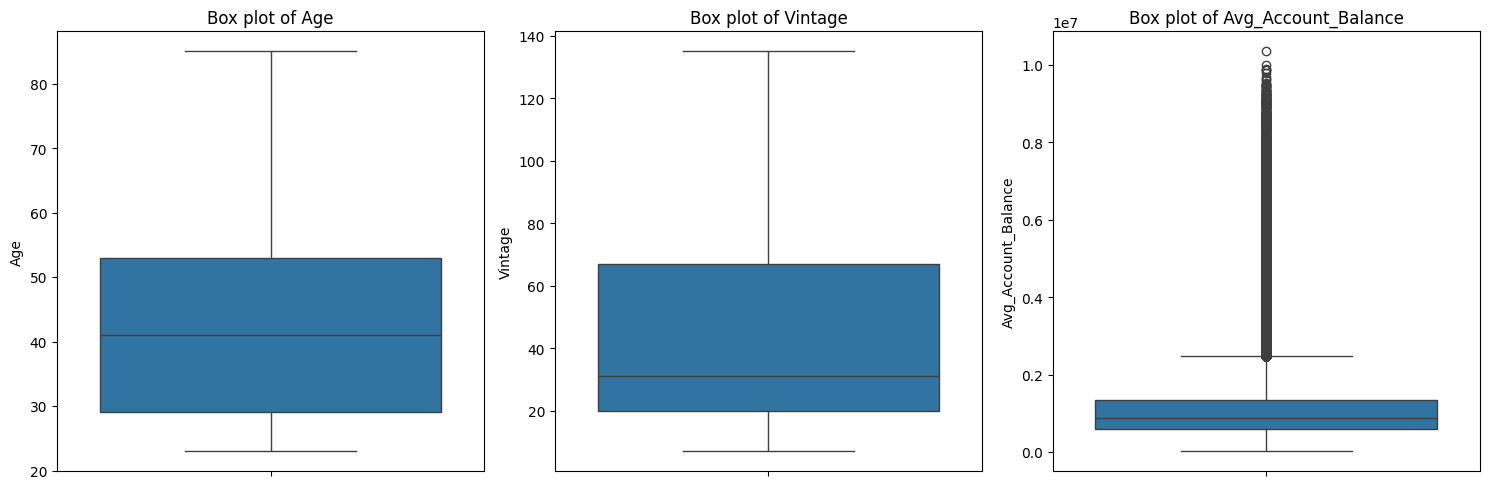

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns
numerical_cols = ['Age', 'Vintage', 'Avg_Account_Balance']

# Create box plots for numerical columns
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

Outliers in 'Avg_Account_Balance':
              ID  Gender  Age Region_Code     Occupation Channel_Code  \
5       MZZAQMPT    Male   60       RG268  Self_Employed           X3   
41      ICTFGWQR  Female   48       RG268   Entrepreneur           X3   
59      4CNSJVVR  Female   44       RG268          Other           X3   
89      FQSHBCUT  Female   72       RG283          Other           X3   
116     K2PVS4RB    Male   27       RG254       Salaried           X1   
...          ...     ...  ...         ...            ...          ...   
350950  GEPQVQKB    Male   48       RG283  Self_Employed           X2   
350965  UKT5GX45    Male   46       RG257  Self_Employed           X1   
350973  ASYCDDTY  Female   30       RG276       Salaried           X1   
350988  2AYXS3T3    Male   35       RG253  Self_Employed           X2   
351013  BG6UHJTS    Male   32       RG277       Salaried           X1   

        Vintage Credit_Product  Avg_Account_Balance Is_Active  Is_Lead  
5           110

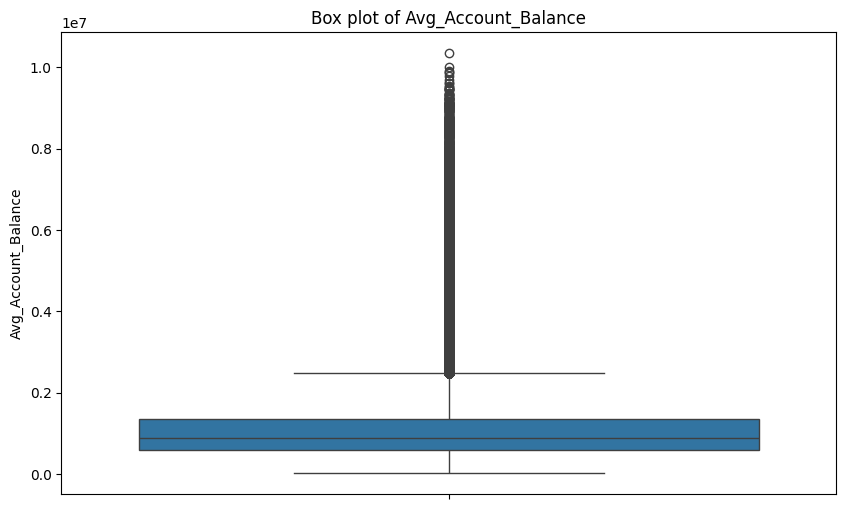

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Avg_Account_Balance'].quantile(0.25)
Q3 = df['Avg_Account_Balance'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Avg_Account_Balance'] < lower_bound) | (df['Avg_Account_Balance'] > upper_bound)]

# Print the outliers
print("Outliers in 'Avg_Account_Balance':")
print(outliers)

# Summary statistics for 'Avg_Account_Balance'
print("\nSummary statistics for 'Avg_Account_Balance':")
print(df['Avg_Account_Balance'].describe())

# Visualization: Box plot of Avg_Account_Balance
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['Avg_Account_Balance'])
plt.title('Box plot of Avg_Account_Balance')
plt.show()

Summary statistics after log transformation:


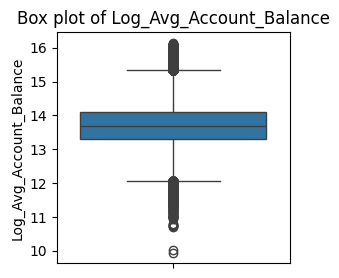

In [17]:
# Apply log transformation
df['Log_Avg_Account_Balance'] = np.log1p(df['Avg_Account_Balance'])

# Check the summary statistics after log transformation
print("Summary statistics after log transformation:")

# Visualize the transformed data
plt.figure(figsize=(3,3))
sns.boxplot(y=df['Log_Avg_Account_Balance'])
plt.title('Box plot of Log_Avg_Account_Balance')
plt.show()

In [18]:
cleaned_data = df.copy()

In [19]:
cleaned_data.to_csv('Cleaned_Dataset.csv', index=False)

In [20]:
df["Avg_Account_Balance"].unique()

array([ 742366,  215949,  868070, ..., 9491986,  570080,  265665],
      dtype=int64)

In [21]:
df.head(5)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Log_Avg_Account_Balance
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No,-1.0,13.517599
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No,-1.0,12.282802
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No,-1.0,13.674029
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No,-1.0,13.395573
5,MZZAQMPT,Male,60,RG268,Self_Employed,X3,110,No,4624262,No,-1.0,15.346828


In [22]:
df1 = pd.read_csv("Cleaned_Dataset.csv")

In [23]:
len(df1)

309190

In [24]:
df1.columns

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead', 'Log_Avg_Account_Balance'],
      dtype='object')

In [25]:
df1.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product             0
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
Log_Avg_Account_Balance    0
dtype: int64

In [26]:
df["Occupation"].unique()

array(['Other', 'Salaried', 'Self_Employed', 'Entrepreneur'], dtype=object)

In [27]:
df["Is_Lead"].unique()

array([-1.,  0.,  1.])

In [28]:
# Define the columns and target variable
columns = ['Gender', 'Age', 'Occupation', 'Channel_Code', 'Vintage', 
           'Credit_Product', 'Avg_Account_Balance', 'Is_Active', 'Log_Avg_Account_Balance']
target = 'Is_Lead'